We will use Invasive Ductal Carcinoma (IDC) 10X Visium data as an example to demonstrate how to apply the stVAT algorithm for predicting gene expression in unmeasured regions of spatial transcriptomics data.

In [1]:
from stVAT import *
import pandas as pd
import anndata as ad
import numpy as np
import scanpy as sc
import torch
import scipy 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
np.random.seed(42)
random.seed(42)
import warnings
warnings.filterwarnings("ignore")

In [2]:
adata = sc.read_visium('/root/stVAT/data/Human_Invasive_Ductal_Carcinoma')
adata.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=10)

In [3]:
train_adata=adata[:,adata.var["n_cells_by_counts"]>len(adata.obs.index)*0.1]
train_counts=np.array(train_adata.X.todense())
train_coords=train_adata.obs[['array_row','array_col']]
test_adata = adata
integral_coords= test_adata.obs[['array_row','array_col']]
test_counts=np.array(test_adata.X.todense())
test_coords=test_adata.obs[['array_row','array_col']]
position_info = get_10X_position_info(integral_coords)
train_lr,train_hr,in_tissue_matrix = get10Xtrainset(train_counts, train_coords)
in_tissue_matrix = torch.Tensor(in_tissue_matrix).to(device)
test_3D_data = get10Xtestset(test_counts, test_coords)
imputed_adata = stVAT(adata, test_3D_data, integral_coords, position_info, train_lr, train_hr, in_tissue_matrix, patch_size=4, num_heads=4,epoch=20,input_dim=1440)

epoch:1, loss:11.879
epoch:2, loss:12.635
epoch:3, loss:11.982
epoch:4, loss:11.585
epoch:5, loss:11.601
epoch:6, loss:11.254
epoch:7, loss:11.217
epoch:8, loss:10.604
epoch:9, loss:10.357
epoch:10, loss:10.215
epoch:11, loss:10.954
epoch:12, loss:10.003
epoch:13, loss:9.796
epoch:14, loss:9.553
epoch:15, loss:9.429
epoch:16, loss:9.559
epoch:17, loss:9.332
epoch:18, loss:8.924
epoch:19, loss:8.773
epoch:20, loss:8.653


In [ ]:
original_adata = adata.copy()
# 调用函数
predicted_expression = integrate_imputed_data(original_adata, imputed_adata)

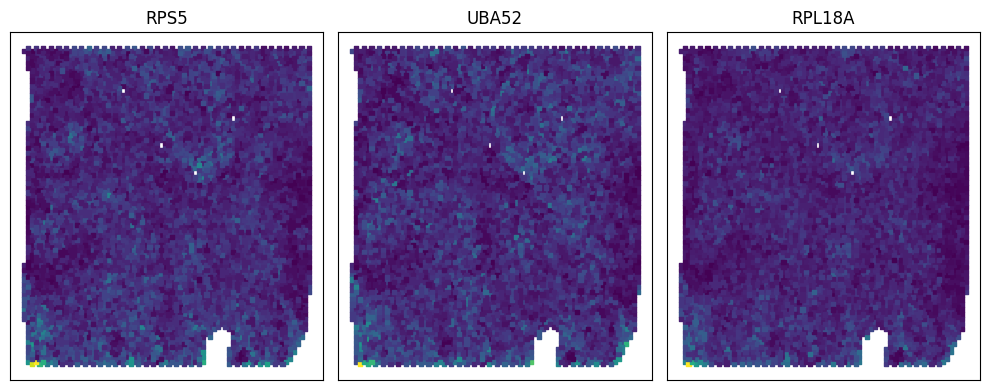

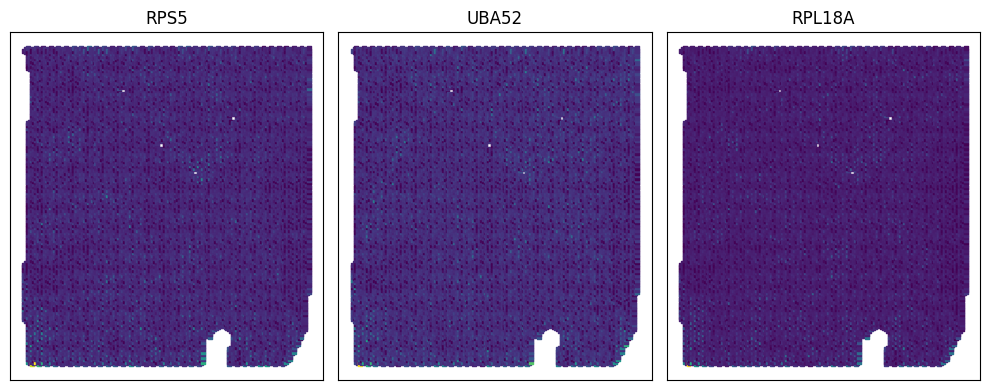

In [5]:
show_genes=['RPS5','UBA52','RPL18A']
plot_genes(adata, show_genes, n=3, size=(10,4),point_size=9)
plot_genes(imputed_adata, show_genes, n=3, size=(10,4),point_size=8)